## using built in functions

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_triangle, threshold_local

# Read the image
img = plt.imread('C:/Users/EXTRA/a04-sbe3110_f22_task4_team18/images/i1.jpg')

# Convert the image to grayscale
gray_img = np.mean(img, axis=-1)



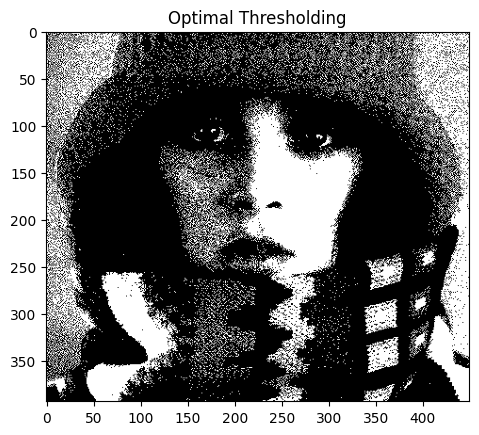

In [33]:
# Threshold using optimal thresholding
optimal_thresh = threshold_otsu(gray_img)
optimal_binary = gray_img > optimal_thresh
plt.imshow(optimal_binary, cmap='gray')
plt.title('Optimal Thresholding')
plt.show()



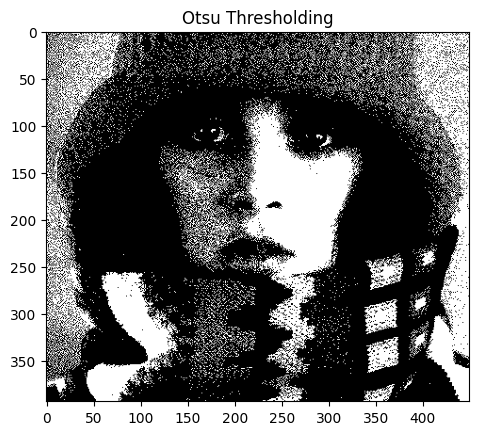

In [34]:
# Threshold using Otsu's thresholding
otsu_thresh = threshold_otsu(gray_img)
otsu_binary = gray_img > otsu_thresh
plt.imshow(otsu_binary, cmap='gray')
plt.title('Otsu Thresholding')
plt.show()



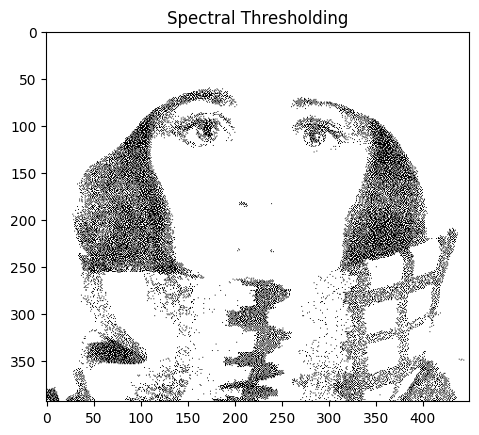

In [35]:
# Threshold using spectral thresholding
spectral_thresh = threshold_triangle(gray_img)
spectral_binary = gray_img > spectral_thresh
plt.imshow(spectral_binary, cmap='gray')
plt.title('Spectral Thresholding')
plt.show()


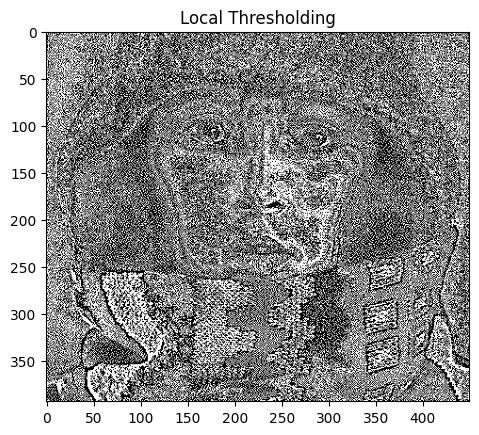

In [36]:

# Threshold using local thresholding
adaptive_thresh = threshold_local(gray_img, block_size=11, method='gaussian', offset=0)
adaptive_binary = gray_img > adaptive_thresh
plt.imshow(adaptive_binary, cmap='gray')
plt.title('Local Thresholding')
plt.show()

## from scratch

In [37]:

# import numpy as np
# import matplotlib.pyplot as plt

# # Read the image
# img = plt.imread('C:/Users/EXTRA/a04-sbe3110_f22_task4_team18/images/i1.jpg')

# # Convert the image to grayscale
# gray_img = np.mean(img, axis=-1)

In [10]:
import numpy as np
from PIL import Image
import cv2
def optimal_threshold(img):
    hist, _ = np.histogram(img, bins=256)
    pixels = img.shape[0] * img.shape[1]
    sum_pixel = np.sum(np.arange(256) * hist)
    sum_back = 0
    w_back = 0
    w_fore = 0
    var_max = 0
    threshold = 0

    for i in range(256):
        w_back += hist[i]
        if w_back == 0:
            continue
        w_fore = pixels - w_back
        if w_fore == 0:
            break
        sum_back += i * hist[i]
        mean_back = sum_back / w_back
        mean_fore = (sum_pixel - sum_back) / w_fore
        var_between = w_back * w_fore * (mean_back - mean_fore) ** 2
        if var_between > var_max:
            var_max = var_between
            threshold = i

    return threshold

In [11]:
def otsu_threshold(img):
    hist, _ = np.histogram(img, bins=256)
    pixels = img.shape[0] * img.shape[1]
    sum_pixel = np.sum(np.arange(256) * hist)
    sum_back = 0
    w_back = 0
    w_fore = 0
    var_max = 0
    threshold = 0

    for i in range(256):
        w_back += hist[i]
        if w_back == 0:
            continue
        w_fore = pixels - w_back
        if w_fore == 0:
            break
        sum_back += i * hist[i]
        mean_back = sum_back / w_back
        mean_fore = (sum_pixel - sum_back) / w_fore
        var_between = w_back * w_fore * (mean_back - mean_fore) ** 2
        if var_between > var_max:
            var_max = var_between
            threshold = i

    return threshold

In [12]:
def spectral_threshold(img):
    mean = np.mean(img)
    return mean

In [13]:
# Load the grayscale image
img = np.array(Image.open('C:/Users/EXTRA/a04-sbe3110_f22_task4_team18/images/i1.jpg').convert('L'))


In [14]:
# Optimal thresholding
optimal_thresh = optimal_threshold(img)
_, optimal_img = cv2.threshold(img, optimal_thresh, 255, cv2.THRESH_BINARY)
print('Optimal threshold:', optimal_thresh)
Image.fromarray(optimal_img).show()


Optimal threshold: 114


In [15]:
# Otsu thresholding
otsu_thresh = otsu_threshold(img)
_, otsu_img = cv2.threshold(img, otsu_thresh, 255, cv2.THRESH_BINARY)
print('Otsu threshold:', otsu_thresh)
Image.fromarray(otsu_img).show()

Otsu threshold: 114


In [16]:
# Spectral thresholding
spectral_thresh = spectral_threshold(img)
_, spectral_img = cv2.threshold(img, spectral_thresh, 255, cv2.THRESH_BINARY)
print('Spectral threshold:', spectral_thresh)
Image.fromarray(spectral_img).show()

Spectral threshold: 77.45691829233814
